In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [2]:
!pip install keras-tcn

     |████████████████████████████████| 1.1 MB 7.6 MB/s 
     |████████████████████████████████| 462 kB 64.4 MB/s 


In [3]:

from tensorflow.keras.utils import to_categorical
from tcn import compiled_tcn

In [4]:
DDoS=pd.read_csv('/content/dataset_sdn.csv')

In [5]:
DDoS.Protocol.unique()
DDoS['Protocol'] = DDoS['Protocol'].replace('TCP', '0')
DDoS['Protocol'] = DDoS['Protocol'].replace('UDP', '1')
DDoS['Protocol'] = DDoS['Protocol'].replace('ICMP', '2')
DDoS.Protocol.unique()

array(['1', '0', '2'], dtype=object)

In [6]:
DDoS['src'] = DDoS['src'].replace('10.0.0.0', '0')
DDoS['src'] = DDoS['src'].replace('10.0.0.2', '1')
DDoS['src'] = DDoS['src'].replace('10.0.0.4', '2')
DDoS['src'] = DDoS['src'].replace('10.0.0.10', '3')
DDoS['src'] = DDoS['src'].replace('10.0.0.5', '4')
DDoS['src'] = DDoS['src'].replace('10.0.0.13', '5')
DDoS['src'] = DDoS['src'].replace('10.0.0.6', '6')
DDoS['src'] = DDoS['src'].replace('10.0.0.11', '7')
DDoS['src'] = DDoS['src'].replace('10.0.0.20', '8')
DDoS['src'] = DDoS['src'].replace('10.0.0.18', '9')
DDoS['src'] = DDoS['src'].replace('10.0.0.12', '10')
DDoS['src'] = DDoS['src'].replace('10.0.0.14', '11')
DDoS['src'] = DDoS['src'].replace('10.0.0.15', '12')
DDoS['src'] = DDoS['src'].replace('10.0.0.16', '13')
DDoS['src'] = DDoS['src'].replace('10.0.0.17', '14')
DDoS['src'] = DDoS['src'].replace('10.0.0.1', '15')
DDoS['src'] = DDoS['src'].replace('10.0.0.3', '16')
DDoS['src'] = DDoS['src'].replace('10.0.0.8', '17')
DDoS['src'] = DDoS['src'].replace('10.0.0.7', '18')
DDoS['src'] = DDoS['src'].replace('10.0.0.9', '19')
DDoS.src.unique()

array(['15', '1', '2', '3', '16', '4', '5', '6', '8', '7', '10', '9',
       '17', '18', '19', '11', '12', '13', '14'], dtype=object)

In [7]:
DDoS['dst'] = DDoS['dst'].replace('10.0.0.8', '0')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.7', '1')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.2', '2')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.4', '3')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '4')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.10', '5')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.3', '6')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '7')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.5', '8')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.9', '9')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.12', '10')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.13', '11')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.14', '12')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.11', '13')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.16', '14')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.1', '15')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.15', '16')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.17', '17')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.18', '18')
DDoS.dst.unique()

array(['0', '1', '6', '8', '5', '11', '15', '13', '2', '3', '9', '4',
       '12', '16', '10', '14', '17', '18'], dtype=object)

In [16]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())

In [17]:
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [14]:
DDoS['label'].value_counts()

0    63561
1    40784
Name: label, dtype: int64

<Figure size 432x288 with 0 Axes>

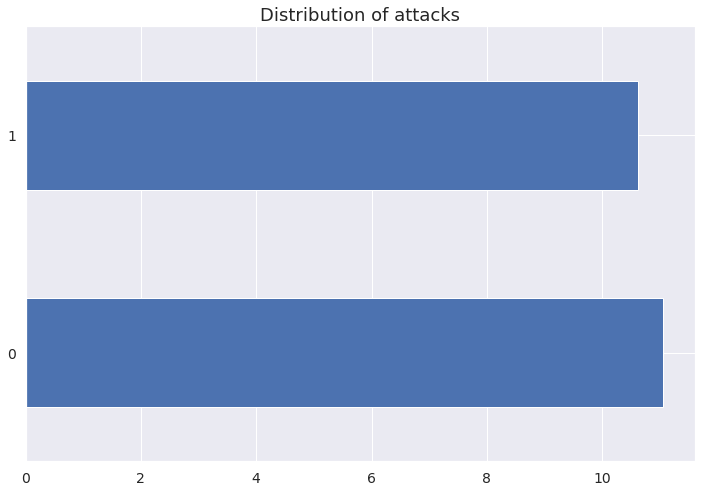

In [15]:
import matplotlib
#log scaled distribution of attacks
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')

DDoS['label'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

In [19]:
DDoS.groupby(["dt","src"]).first()

switch dst  pktcount  bytecount  dur   dur_nsec       tot_dur  \
dt    src                                                                  
2488  15        1   6     21333   22740978   47    9000000  4.700900e+10   
2518  15        1   6     34545   36824970   77   10000000  7.701000e+10   
      7         2   6     11815   12594790   23   11000000  2.301100e+10   
2548  1         1   6      3298    3515668    7  321000000  7.321000e+09   
      15        1   6     48195   51375870  107   13000000  1.070000e+11   
...           ...  ..       ...        ...  ...        ...           ...   
42905 17        4   8    119879  132884998  271  258000000  2.710000e+11   
      18        4   8    131659  146945030  321  285000000  3.210000e+11   
      4         4   1     92159    6082614  321  235000000  3.210000e+11   
42935 17        3   8    131851  146971542  301  256000000  3.010000e+11   
      4         3   0     92532    6107484  301  250000000  3.010000e+11   

           flows  packetins  pktperflow  ...  pktrate  Pairflow  Protocol  \
dt    src                                ...                                
2488  15       2        219       13632  ...      454         0         1   
2518  15       2       1699       13212  ...      440         0         1   
      7        3       1699           0  ...        0         0         1   
2548  1        3       1814           0  ...        0         0         1   
      15       3       1814       13650  ...      455         0         1   
...          ...        ...         ...  ...      ...       ...       ...   
42905 17       5      13249       12927  ...      430         1         0   
      18       5      13249        4014  ...      133         1         0   
      4        5      13249        2890  ...       96         1         0   
42935 17       3      13249       11972  ...      399         1         0   
      4        3      13249        7050  ...      235         1         0   

          port_no   tx_bytes   rx_bytes  tx_kbps     rx_kbps     tot_kbps  \
dt    src                                                                   
2488  15        2       3054       1192        0     0.00000     0.000000   
2518  15        2       3405       1102        0     0.00000     0.000000   
      7         1       3059       3185        0  1003.81142  2007.578742   
2548  1         4       3339   27598685        0  3837.00000  3837.000000   
      15        1       3427       1102        0     0.00000     0.000000   
...           ...        ...        ...      ...         ...          ...   
42905 17        4   41170003  474153807        0     0.00000     0.000000   
      18        4   41170003  474153807        0     0.00000     0.000000   
      4         4   41170003  474153807        0     0.00000     0.000000   
42935 17        1  761090193   45681512     3733   123.00000  3856.000000   
      4         1  761090193   45681512     3733   123.00000  3856.000000   

           label  
dt    src         
2488  15       0  
2518  15       0  
      7        1  
2548  1        1  
      15       0  
...          ...  
42905 17       0  
      18       1  
      4        1  
42935 17       0  
      4        1  

[3657 rows x 21 columns]

In [22]:
DDoS.groupby(["dt","src"]).count()

switch  dst  pktcount  bytecount  dur  dur_nsec  tot_dur  flows  \
dt    src                                                                    
2488  15       54   54        54         54   54        54       54     54   
2518  15       56   56        56         56   56        56       56     56   
      7       168  168       168        168  168       168      168    168   
2548  1        56   56        56         56   56        56       56     56   
      15       56   56        56         56   56        56       56     56   
...           ...  ...       ...        ...  ...       ...      ...    ...   
42905 17        8    8         8          8    8         8        8      8   
      18        8    8         8          8    8         8        8      8   
      4        16   16        16         16   16        16       16     16   
42935 17        8    8         8          8    8         8        8      8   
      4         8    8         8          8    8         8        8      8   

           packetins  pktperflow  ...  pktrate  Pairflow  Protocol  port_no  \
dt    src                         ...                                         
2488  15          54          54  ...       54        54        54       54   
2518  15          56          56  ...       56        56        56       56   
      7          168         168  ...      168       168       168      168   
2548  1           56          56  ...       56        56        56       56   
      15          56          56  ...       56        56        56       56   
...              ...         ...  ...      ...       ...       ...      ...   
42905 17           8           8  ...        8         8         8        8   
      18           8           8  ...        8         8         8        8   
      4           16          16  ...       16        16        16       16   
42935 17           8           8  ...        8         8         8        8   
      4            8           8  ...        8         8         8        8   

           tx_bytes  rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
dt    src                                                         
2488  15         54        54       54       54        54     54  
2518  15         56        56       56       56        56     56  
      7         168       168      168      168       168    168  
2548  1          56        56       56       56        56     56  
      15         56        56       56       56        56     56  
...             ...       ...      ...      ...       ...    ...  
42905 17          8         8        8        8         8      8  
      18          8         8        8        8         8      8  
      4          16        16       16       16        16     16  
42935 17          8         8        8        8         8      8  
      4           8         8        8        8         8      8  

[3657 rows x 21 columns]

In [23]:
DDoS.groupby(["dt","src"]).label.count()

dt     src
2488   15      54
2518   15      56
       7      168
2548   1       56
       15      56
             ... 
42905  17       8
       18       8
       4       16
42935  17       8
       4        8
Name: label, Length: 3657, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X = DDoS[['src','dst','dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]
y = DDoS['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Feature scaling (or standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=2,
                         nb_filters=22,
                         activation='relu',
                         kernel_initializer='he_normal',
                         use_batch_norm=False,
                         use_layer_norm=False,
                         use_weight_norm=False,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(2)],
                         nb_stacks=1,
                         max_len=X_train[0:1].shape[1],
                         use_skip_connections=True)

x.shape= (None, 22)
model.x = (None, 22, 1)
model.y = (None, 2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22, 1)]           0         
                                                                 
 tcn (TCN)                   (None, 22)                8976      
                                                                 
 dense (Dense)               (None, 2)                 46        
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 9,022
Trainable params: 9,022
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train, epochs = 20,validation_split=0.2,verbose = 1)

Epoch 1/20
2087/2087 [==============================] - 19s 8ms/step - loss: 0.1358 - accuracy: 0.9460 - val_loss: 0.0676 - val_accuracy: 0.9756
Epoch 2/20
2087/2087 [==============================] - 16s 7ms/step - loss: 0.0640 - accuracy: 0.9758 - val_loss: 0.0383 - val_accuracy: 0.9863
Epoch 3/20
2087/2087 [==============================] - 16s 8ms/step - loss: 0.0446 - accuracy: 0.9827 - val_loss: 0.0357 - val_accuracy: 0.9856
Epoch 4/20
2087/2087 [==============================] - 16s 8ms/step - loss: 0.0348 - accuracy: 0.9866 - val_loss: 0.0260 - val_accuracy: 0.9897
Epoch 5/20
2087/2087 [==============================] - 16s 7ms/step - loss: 0.0308 - accuracy: 0.9881 - val_loss: 0.0163 - val_accuracy: 0.9943
Epoch 6/20
2087/2087 [==============================] - 16s 8ms/step - loss: 0.0280 - accuracy: 0.9895 - val_loss: 0.0180 - val_accuracy: 0.9920
Epoch 7/20
2087/2087 [==============================] - 17s 8ms/step - loss: 0.0251 - accuracy: 0.9908 - val_loss: 0.0220 - val_ac

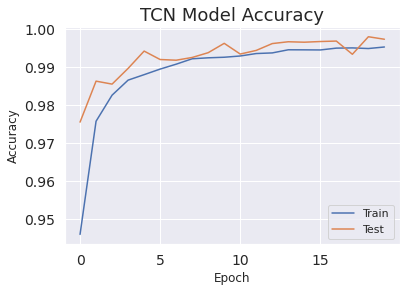

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('TCN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('TCN Model Accuracy.png')
plt.show()

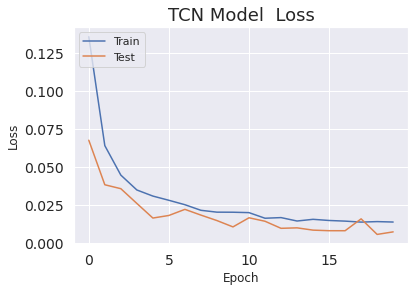

In [30]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('TCN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('TCN Model Loss.png')
plt.show()

In [31]:
predict = model.predict(X_test, verbose=1)

653/653 [==============================] - 2s 3ms/step


In [32]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

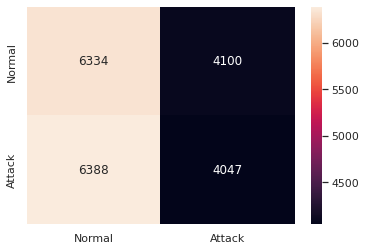

In [33]:
import seaborn as sns; sns.set()
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Normal","Attack"],columns = ["Normal","Attack"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [34]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.67%
